# Spaceship Titanic

Predict survival on the Titanic and get familiar with ML basics

https://www.kaggle.com/competitions/spaceship-titanic/data

Kaggle Profile: https://www.kaggle.com/remyflatt

Achieves: A score of 0.72667 


# Helper functions

In [1]:
# Import helper functions from my github
!wget https://raw.githubusercontent.com/remz99/Kaggle/main/helper_functions.py

from helper_functions import plot_loss_curves, save_model_to_drive


--2023-03-04 07:08:12--  https://raw.githubusercontent.com/remz99/Kaggle/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1029 (1.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   1.00K  --.-KB/s    in 0s      

2023-03-04 07:08:12 (64.9 MB/s) - ‘helper_functions.py’ saved [1029/1029]



# Import Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

tf.random.set_seed(42)

# Load Data

In [3]:
DIR_PATH   = "/content/drive/MyDrive/Kaggle/spaceship-titanic"
TRAIN_PATH = DIR_PATH + "/" + "train.csv"
TEST_PATH  = DIR_PATH + "/" + "test.csv"

In [4]:
train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)

# Exploratory data analysis

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# Find rows in train data with NA values
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

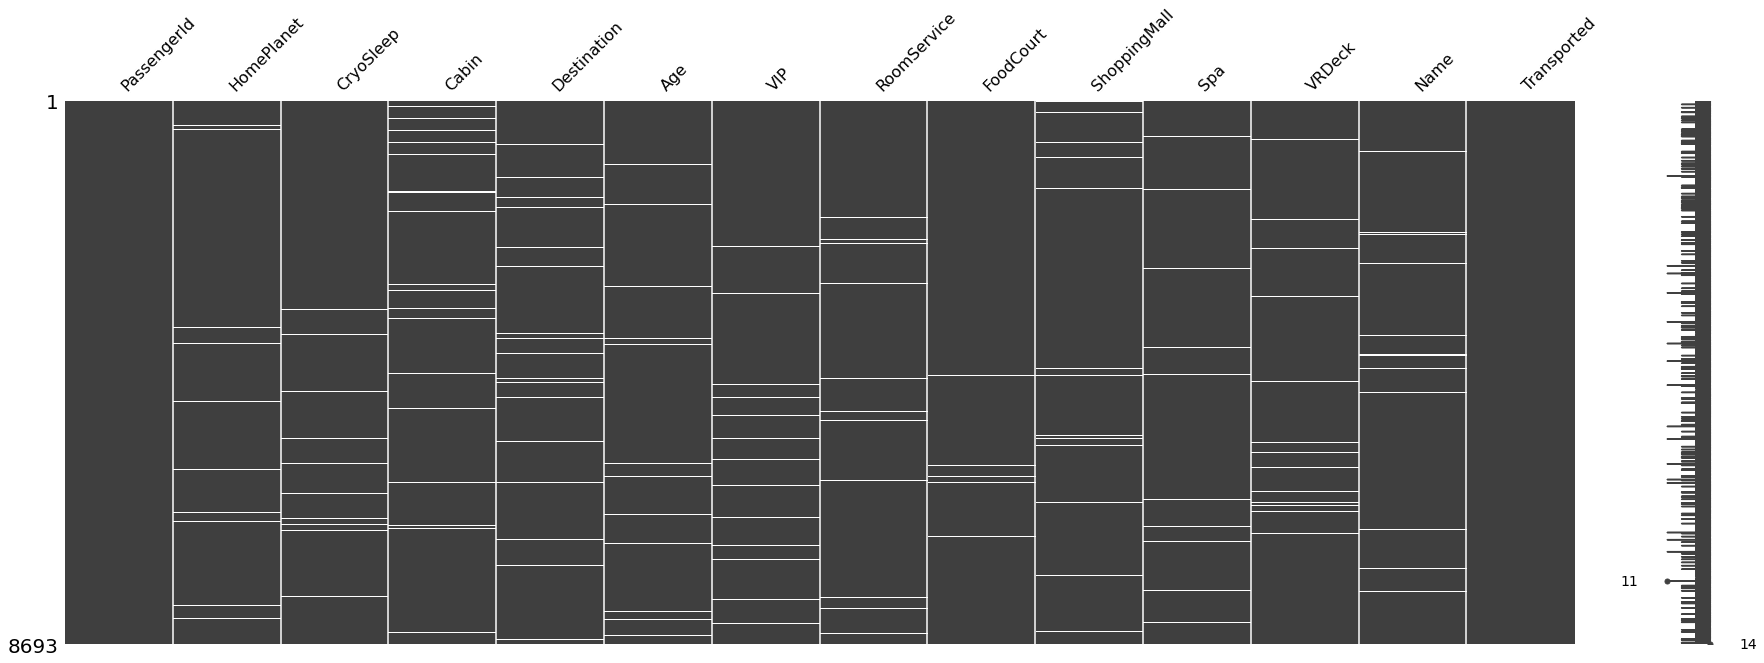

In [9]:
# Plot graphic of missing values for training data
missingno.matrix(train_df, figsize = (30, 10))

In [10]:
# Find rows in test data with NA values
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<AxesSubplot:>

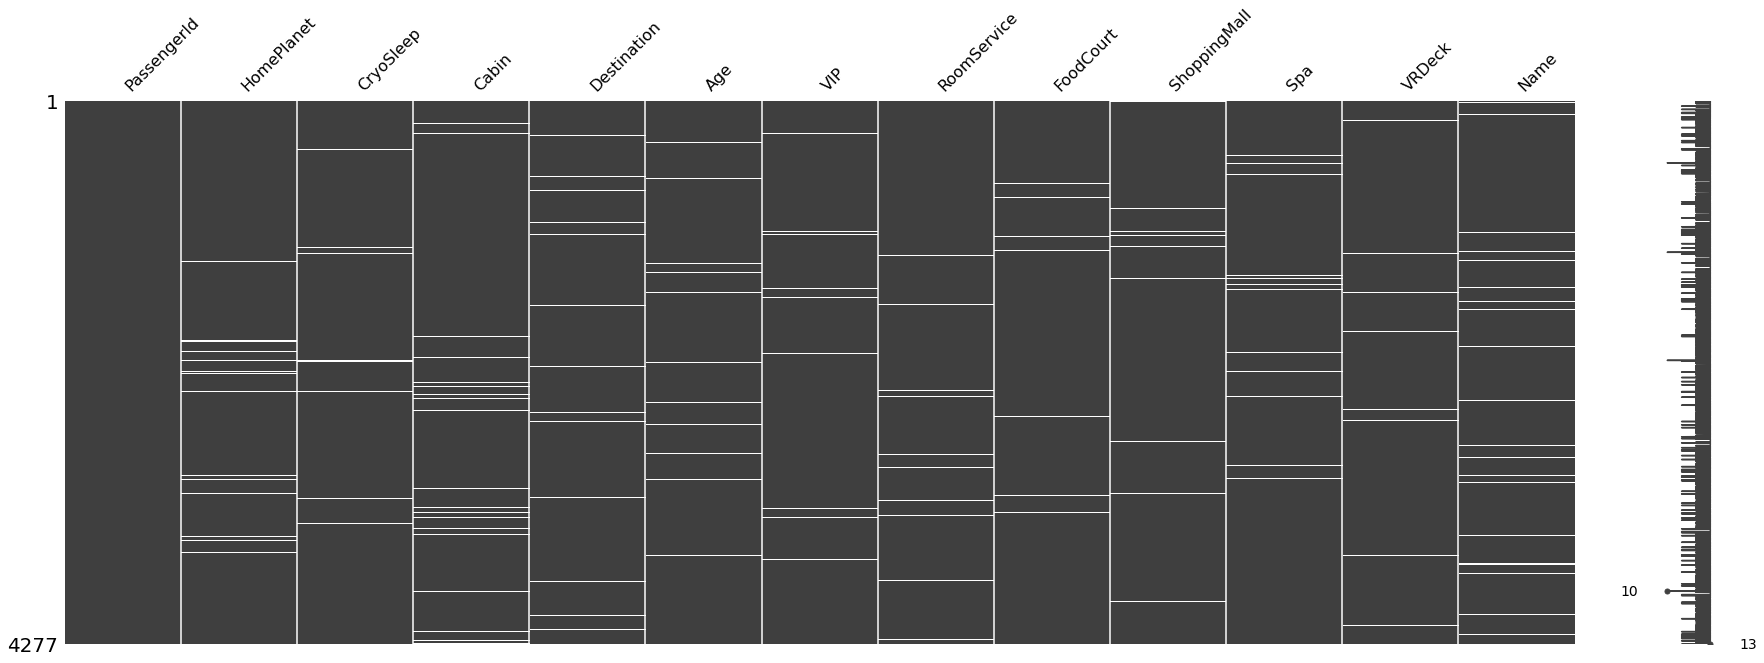

In [11]:
# Plot graphic of missing values for test data
missingno.matrix(test_df, figsize = (30, 10))

It looks like that all columns apart from `PassengerId` and `Transported` have null values

In [12]:
# Look at correlation between numerical values
train_df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


## PassengerID

Id of each passenger.

Dtype: Object

In [13]:
train_df.PassengerId.isna().sum(), test_df.PassengerId.isna().sum()

(0, 0)

There are no missing values for the PassengerId column.

PassengerId will not be used in modelling but will be part of the Kaggle submission

## VIP

Whether the passenger has paid for special VIP service during the voyage.

Dtype: Object

False    8291
True      199
Name: VIP, dtype: int64


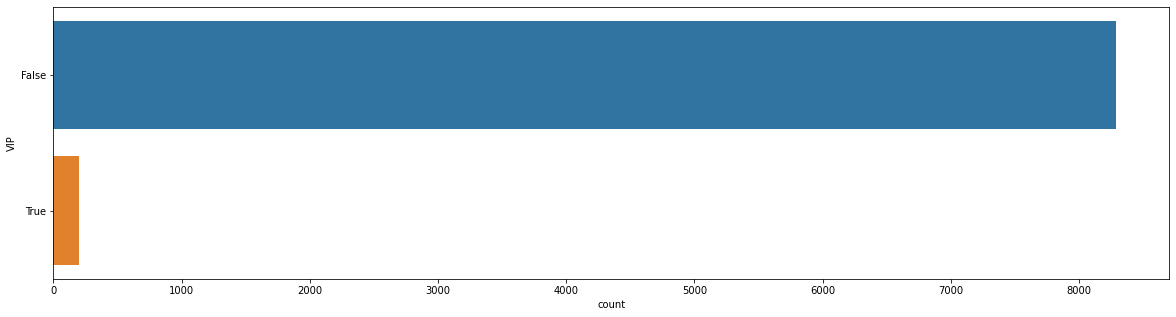

In [14]:
print(train_df.VIP.value_counts())

plt.figure(figsize=(20, 5))
sns.countplot(y="VIP", data=train_df);

Of all the passengers there are 199 that are VIP.

In [15]:
train_df.VIP.isna().sum(), test_df.VIP.isna().sum()

(203, 93)

In [16]:
print(train_df[train_df["VIP"] == True].Transported.value_counts())

False    123
True      76
Name: Transported, dtype: int64


Of the 199 VIP passengers only 76 survived.

False    123
True      76
Name: Transported, dtype: int64


Text(0, 0.5, 'Transported Probability')

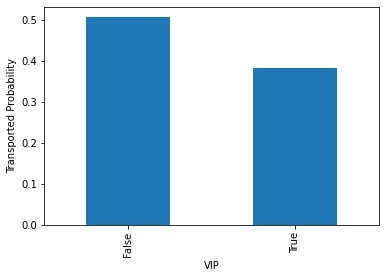

In [17]:
# See if there is a pattern between VIP and Transported
print(train_df[train_df["VIP"] == True].Transported.value_counts())

vip_survived_plt = train_df[['VIP', 'Transported']].groupby('VIP').mean().Transported.plot(kind='bar')
vip_survived_plt.set_xlabel('VIP')
vip_survived_plt.set_ylabel('Transported Probability')

Being a VIP passenger doesn't guarantee that a passenger will be transported.

With including NA values Passengers that are VIP they have a 38% chance of being transported.

The VIP column has null values, we can assume that if a Passenger has a NULL VIP then we can replace it with False

## Name

The first and last names of the passenger.

Dtype: Object

In [18]:
train_df.Name.value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [19]:
train_df.Name.isna().sum(), test_df.Name.isna().sum()

(200, 94)

There appear to be duplicate name values, we'll ignore `Name` from our modelling.

## HomePlanet

The planet the passenger departed from, typically their planet of permanent residence.

Dtype: Object

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


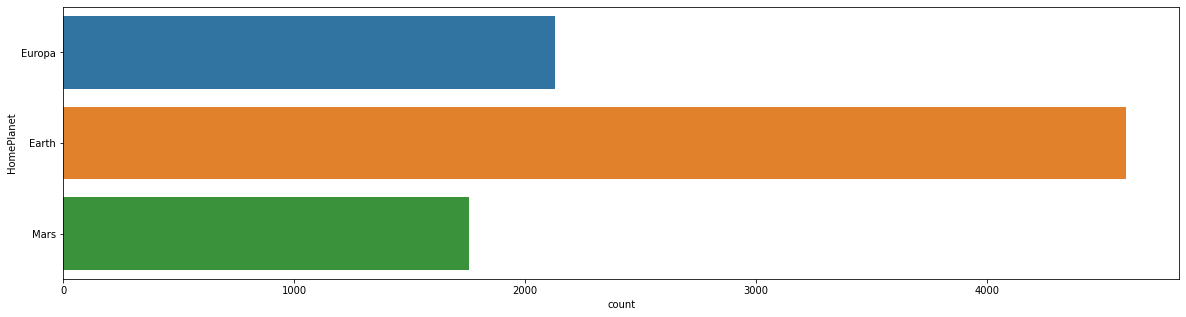

In [20]:
print(train_df.HomePlanet.value_counts())

plt.figure(figsize=(20, 5))
sns.countplot(y="HomePlanet", data=train_df);

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64


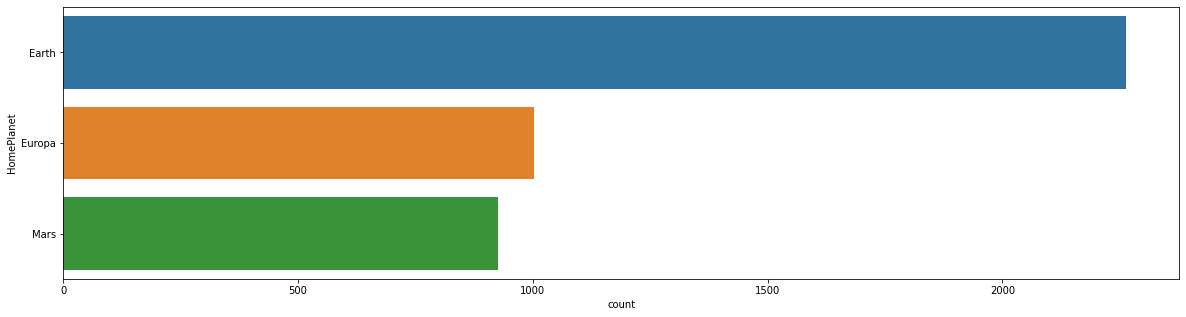

In [21]:
print(test_df.HomePlanet.value_counts())

plt.figure(figsize=(20, 5))
sns.countplot(y="HomePlanet", data=test_df);

In [22]:
train_df.HomePlanet.isna().sum(), test_df.HomePlanet.isna().sum()

(201, 87)

In [23]:
earth_home = len(train_df[train_df.HomePlanet == 'Earth']) / len(train_df)
europa_dest = len(train_df[train_df.HomePlanet == 'Europa']) / len(train_df)
mars_dest = len(train_df[train_df.HomePlanet == 'Mars']) / len(train_df)

na_dest = len(train_df[train_df.HomePlanet.isna() == True]) / len(train_df)

pd.DataFrame({
  'Name': ['Earth', 'Europa', 'Mars', 'NA'],
  '%': [earth_home, europa_dest, mars_dest, na_dest]
})

,Name,%
0,Earth,0.529391
1,Europa,0.245140
2,Mars,0.202347
3,NA,0.023122


Both datasets have NA HomePlanet values. In both datasets `Earth` is the most common HomePlanet(55% in the training dataset).

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64


Text(0, 0.5, 'Transported Probability for HomePlanet')

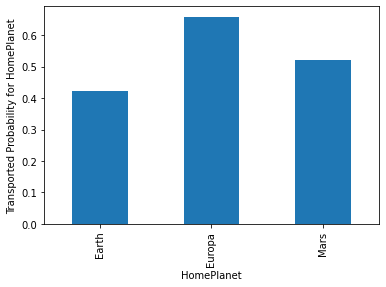

In [24]:
# See if there is a pattern between HomePlanet and Transported
print(train_df[['HomePlanet', 'Transported']].groupby('HomePlanet').mean().Transported)

homeplanet_survived_plt = train_df[['HomePlanet', 'Transported']].groupby('HomePlanet').mean().Transported.plot(kind='bar')
homeplanet_survived_plt.set_xlabel('HomePlanet')
homeplanet_survived_plt.set_ylabel('Transported Probability for HomePlanet')

In [25]:
print(train_df[['HomePlanet', 'Transported']].groupby('HomePlanet').count())

            Transported
HomePlanet             
Earth              4602
Europa             2131
Mars               1759


We'll include the HomePlanet feature in our modelling but we'll have to figure out a way to replace NA values.

In [26]:
# One option we could do to fill NA HomePlanet values is to set the value based on the data
# for when CyroSleep and Destination have the same values
train_df[['CryoSleep', 'Destination', 'HomePlanet']].value_counts()

CryoSleep  Destination    HomePlanet
False      TRAPPIST-1e    Earth         2209
                          Mars           879
True       TRAPPIST-1e    Earth          809
False      TRAPPIST-1e    Europa         711
True       TRAPPIST-1e    Mars           561
False      55 Cancri e    Earth          472
True       TRAPPIST-1e    Europa         447
           55 Cancri e    Europa         441
False      55 Cancri e    Europa         420
True       PSO J318.5-22  Earth          355
False      PSO J318.5-22  Earth          340
True       55 Cancri e    Earth          205
False      55 Cancri e    Mars           112
True       55 Cancri e    Mars            76
False      PSO J318.5-22  Mars            36
True       PSO J318.5-22  Mars            11
False      PSO J318.5-22  Europa          10
True       PSO J318.5-22  Europa           9
dtype: int64

We can use this 

## CryoSleep

Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Dtype: Object

False    5439
True     3037
Name: CryoSleep, dtype: int64


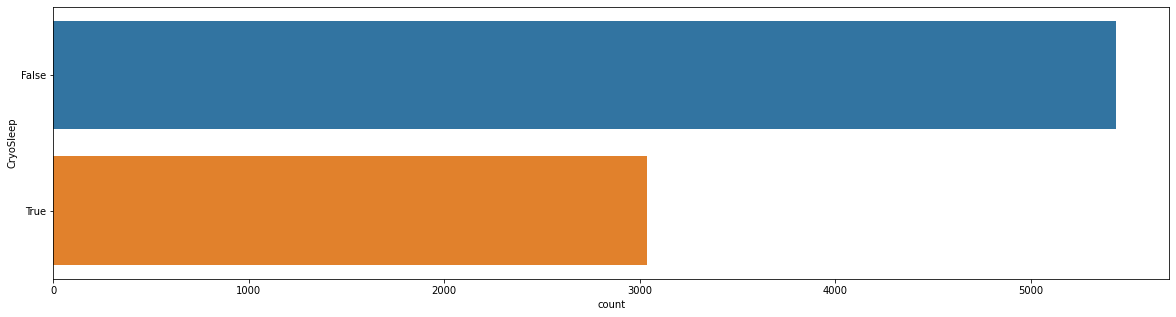

In [27]:
print(train_df.CryoSleep.value_counts())

plt.figure(figsize=(20, 5))
sns.countplot(y="CryoSleep", data=train_df);

In [28]:
train_df.CryoSleep.isna().sum(), test_df.CryoSleep.isna().sum()

(217, 93)

Of all the passengers there are 3037 that have CryoSleep.

In [29]:
print(train_df[train_df["CryoSleep"] == True].Transported.value_counts())

True     2483
False     554
Name: Transported, dtype: int64


Of the 3037 CyroSleep passengers 2483 were transported(81%).

True     2483
False     554
Name: Transported, dtype: int64


Text(0, 0.5, 'Transported Probability')

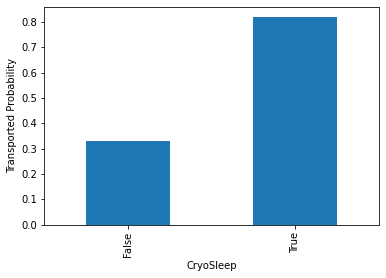

In [30]:
# See if there is a pattern between VIP and Transported
print(train_df[train_df["CryoSleep"] == True].Transported.value_counts())

vip_survived_plt = train_df[['CryoSleep', 'Transported']].groupby('CryoSleep').mean().Transported.plot(kind='bar')
vip_survived_plt.set_xlabel('CryoSleep')
vip_survived_plt.set_ylabel('Transported Probability')

Both datasets have NA values for CryoSleep. We can assume that if a Passenger has NA for CyroSleep then it will be false

Passengers with CryoSleep have a much higher probability of being Transported than those that don't so we'll include this feature in our modelling.

## Age

The age of the passenger.

Dtype: float64

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


<AxesSubplot:ylabel='Frequency'>

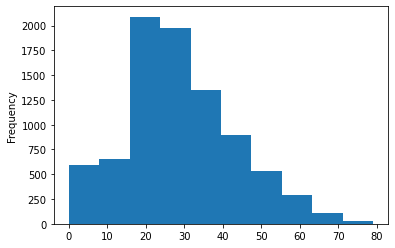

In [31]:
print(train_df.Age.value_counts())

train_df.Age.plot.hist()

In [32]:
train_df.Age.isna().sum(), test_df.Age.isna().sum()

(179, 91)

In [33]:
print(f"Train Age Mean: {train_df.Age.mean()}, Median: {train_df.Age.median()}")
print(f"Test Age Mean: {test_df.Age.mean()}, Median: {test_df.Age.median()}")

Train Age Mean: 28.82793046746535, Median: 27.0
Test Age Mean: 28.65814620162446, Median: 26.0


<AxesSubplot:ylabel='Frequency'>

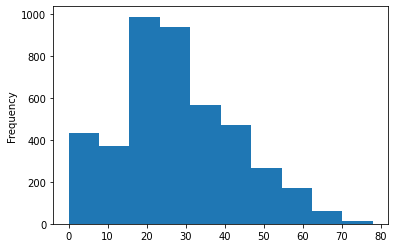

In [34]:
# See if there are any outliers when it comes to the age of passengers that were transported
train_df[train_df["Transported"] == True].Age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

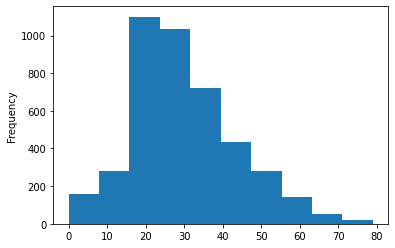

In [35]:
# See if there are any outliers when it comes to the age of passengers that were transported
train_df[train_df["Transported"] == False].Age.plot.hist()

There are not any outliers when it comes to the age of passengers that were transported. Both datasets have null values. We can replace null values with the mean age of both datasets

## Destination

The planet the passenger will be debarking to

Dtype: Object

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


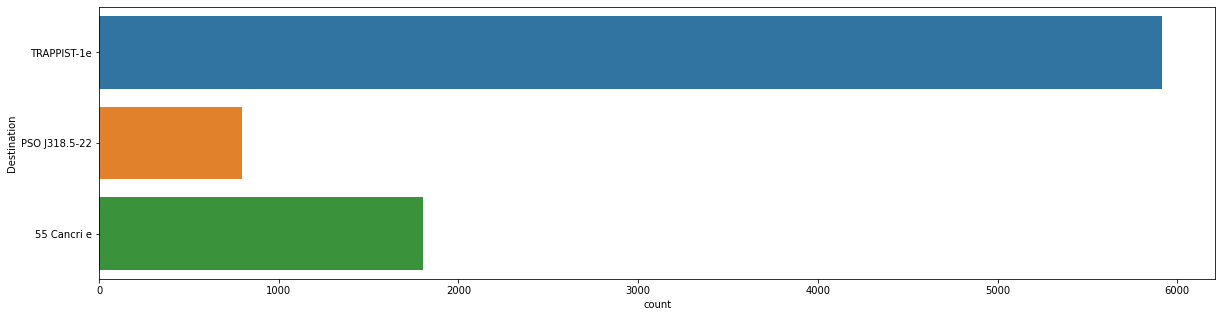

In [36]:
print(train_df.Destination.value_counts())

plt.figure(figsize=(20, 5))
sns.countplot(y="Destination", data=train_df);

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64


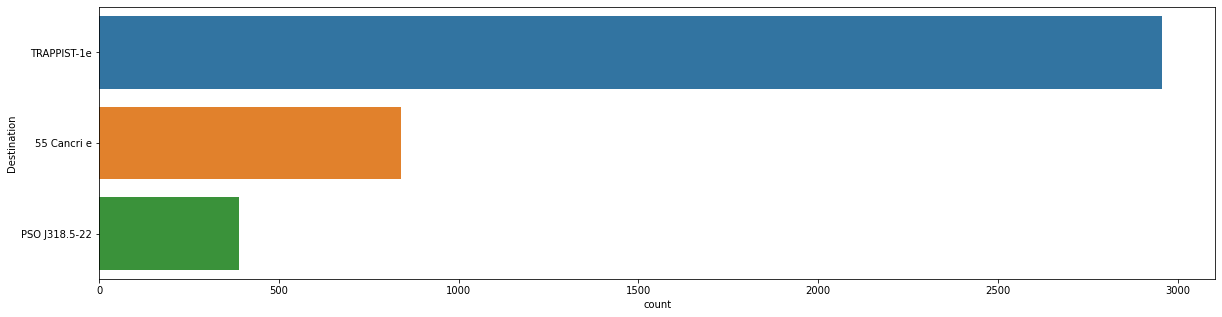

In [37]:
print(test_df.Destination.value_counts())

plt.figure(figsize=(20, 5))
sns.countplot(y="Destination", data=test_df);

In [38]:
trappist_dest = len(train_df[train_df.Destination == 'TRAPPIST-1e']) / len(train_df)
cancri_dest = len(train_df[train_df.Destination == '55 Cancri e']) / len(train_df)
pso_dest = len(train_df[train_df.Destination == 'PSO J318.5-22']) / len(train_df)

na_dest = len(train_df[train_df.Destination.isna() == True]) / len(train_df)

pd.DataFrame({
  'Name': ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', 'NA'],
  '%': [trappist_dest, cancri_dest, pso_dest, na_dest]
})

,Name,%
0,TRAPPIST-1e,0.680433
1,55 Cancri e,0.207063
2,PSO J318.5-22,0.091568
3,NA,0.020936


In [39]:
train_df.Destination.isna().sum(), test_df.Destination.isna().sum()

(182, 92)

Majority of passenger's destination is TRAPPIST-1e, both datasets have NA values.

One option we could do for replace NA values is to just replace them with 'TRAPPIST-1e' as it's the most common Destination(68% in training data). It looks like the test dataset has a similar distribution of NA values.



## Cabin

The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Dtype: Object

In [40]:
train_df.Cabin.value_counts().sum()

8494

In [41]:
len(train_df.Cabin.unique()),

(6561,)

In [42]:
train_df.Cabin.isna().sum(), test_df.Cabin.isna().sum()

(199, 100)

To fill NA values what we'll do is splitout the Deck and Side from the Cabin column and replace NA values with the mode. Then we'll ignore Cabin from the modelling.

In [43]:
train_df['CabinDeck'] = np.nan
train_df['CabinSide'] = np.nan

test_df['CabinDeck'] = np.nan
test_df['CabinSide'] = np.nan

## RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 

Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Dtype: float64


In [44]:
AMENITIES = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[AMENITIES].isna().sum()

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [45]:
# Passengers with CryoSleep and have NA values for amenities
train_df[train_df.CryoSleep == True][AMENITIES].isna().sum()


RoomService     68
FoodCourt       70
ShoppingMall    96
Spa             65
VRDeck          62
dtype: int64

In [46]:
for col in AMENITIES:
  mean = train_df[col].mean()
  median = train_df[col].median()
  std = train_df[col].std()

  print(f"{col}: Mean: {mean}, Median: {median}, std: {std}")


RoomService: Mean: 224.687617481203, Median: 0.0, std: 666.7176629280652
FoodCourt: Mean: 458.07720329024676, Median: 0.0, std: 1611.4892403550716
ShoppingMall: Mean: 173.72916912197996, Median: 0.0, std: 604.6964584708243
Spa: Mean: 311.1387779083431, Median: 0.0, std: 1136.7055348344065
VRDeck: Mean: 304.8547912992357, Median: 0.0, std: 1145.7171888056614


What we can do to fill in NA values is for Passengers in CryoSleep to fill them with 0 and for passengers not in CryoSleep to fill them with the median values as there is a big std for each amenity.

# Feature Engineering

### VIP

We can replace NA values with False, as we can assume that if they don't have a VIP value then they are not a VIP.

In [47]:
train_df.VIP.fillna(False, inplace=True)
test_df.VIP.fillna(False, inplace=True)

## CyroSleep

We can replace NA values with False, as we can assume that if they don't have a CyroSleep value then they didn't have it.

In [48]:
train_df.CryoSleep.fillna(False, inplace=True)
test_df.CryoSleep.fillna(False, inplace=True)

## Destination

We can replace NA values with the most common for the datasets: 'TRAPPIST-1e'

In [49]:
train_df.Destination.mode(), test_df.Destination.mode()

(0    TRAPPIST-1e
 dtype: object, 0    TRAPPIST-1e
 dtype: object)

In [50]:
train_df.Destination.fillna('TRAPPIST-1e', inplace=True)
test_df.Destination.fillna('TRAPPIST-1e', inplace=True)

## HomePlanet

I did an experiment with setting the HomePlanet to the value most common for passengers with the same Destination and CyroSleep and it performed worse than just setting all NA values to 'Earth'

In [51]:
train_df.HomePlanet.mode(), test_df.HomePlanet.mode()

(0    Earth
 dtype: object, 0    Earth
 dtype: object)

In [52]:
train_df.HomePlanet.fillna('Earth', inplace=True)
test_df.HomePlanet.fillna('Earth', inplace=True)

## Age

We can replace NA values with the mean for the dataset

In [53]:
train_df.Age.fillna(train_df.Age.mean(), inplace=True)
test_df.Age.fillna(test_df.Age.mean(), inplace=True)

# Cast from float64 to float32
train_df.Age = train_df.Age.astype('float32')
test_df.Age = test_df.Age.astype('float32')

## Cabin

We'll try replacing NA values with `fillna(method='ffil')` to start with and see how it performs

In [54]:
train_df.Cabin = train_df.Cabin.fillna(method='ffill')
test_df.Cabin = test_df.Cabin.fillna(method='ffill')


In [55]:
# Add columns for Deck, Side
train_df['CabinDeck'] = train_df.Cabin.apply(lambda x: str(x).split('/')).apply(lambda x: x[0])
train_df['CabinSide'] = train_df.Cabin.apply(lambda x: str(x).split('/')).apply(lambda x: x[2])

test_df['CabinDeck'] = test_df.Cabin.apply(lambda x: str(x).split('/')).apply(lambda x: x[0])
test_df['CabinSide'] = test_df.Cabin.apply(lambda x: str(x).split('/')).apply(lambda x: x[2])


## RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 

We can replace NA values for Passengers wit CryoSleep with 0 and for the rest we can fillna with the mean

In [56]:
# Set amentity columns to 0 for passengers in CryoSleep
train_df.loc[train_df.CryoSleep == True, AMENITIES] = 0
test_df.loc[test_df.CryoSleep == True, AMENITIES] = 0

In [57]:
for col in AMENITIES:
  #train_col_mean = train_df.loc[train_df.CryoSleep == False, col].mean()
  train_col_median = train_df.loc[train_df.CryoSleep == False, col].median()
  train_df.loc[train_df.CryoSleep == False, col] = train_col_median

  #test_col_mean = test_df.loc[test_df.CryoSleep == False, col].mean()
  test_col_median = test_df.loc[test_df.CryoSleep == False, col].median()
  test_df.loc[test_df.CryoSleep == False, col] = test_col_median


In [58]:
# Cast to to float32

# RoomService
train_df.RoomService = train_df.RoomService.astype('float32')
test_df.RoomService = test_df.RoomService.astype('float32')

# FoodCourt
train_df.FoodCourt = train_df.FoodCourt.astype('float32')
test_df.FoodCourt = test_df.FoodCourt.astype('float32')

# ShoppingMall
train_df.ShoppingMall = train_df.ShoppingMall.astype('float32')
test_df.ShoppingMall = test_df.ShoppingMall.astype('float32')

# Spa
train_df.Spa = train_df.Spa.astype('float32')
test_df.Spa = test_df.Spa.astype('float32')

# VRDeck
train_df.VRDeck = train_df.VRDeck.astype('float32')
test_df.VRDeck = test_df.VRDeck.astype('float32')

## Name

We'll remove the Name column from testing

In [59]:
#train_df.drop(['Name'], axis=1, inplace=True)
#test_df.drop(['Name'], axis=1, inplace=True)

train_df = train_df[['Transported', 'HomePlanet', 'VIP', 'CryoSleep', 'Age', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinDeck', 'CabinSide']]
test_df = test_df[['PassengerId', 'HomePlanet', 'VIP', 'CryoSleep', 'Age', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinDeck', 'CabinSide']]

# Basic Model

Lets create a basic model using just the `HomePlanet` 

In [60]:
# Confirm there are no NA values
print("Train:")
print(train_df.isna().sum()) 
print()

print("Test:")
test_df.isna().sum()

Train:
Transported     0
HomePlanet      0
VIP             0
CryoSleep       0
Age             0
Destination     0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CabinDeck       0
CabinSide       0
dtype: int64

Test:


PassengerId     0
HomePlanet      0
VIP             0
CryoSleep       0
Age             0
Destination     0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CabinDeck       0
CabinSide       0
dtype: int64

## Create an input pipeline using tf.data

In [61]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32, inference=False):
  df = dataframe.copy()
  
  if inference == False: 
    labels = df.pop('Transported')
  
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}

  if inference == False:
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
  else:
    ds = tf.data.Dataset.from_tensor_slices((df))

  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  
  return ds

### Numerical columns

Use a tf.keras.layers.Normalization layer to standardize the distribution of the data.

In [62]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

### Categorical columns

Define another new utility function that returns a layer which maps values from a vocabulary to integer indices and multi-hot encodes the features using the tf.keras.layers.StringLookup, tf.keras.layers.IntegerLookup, and tf.keras.CategoryEncoding preprocessing layers:

In [63]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

## Create Dataset

In [64]:
# Split train_df into train_data(80% of train_df) and val_data(20% of train_df)
train_data, val_data = np.split(train_df.sample(frac=1), [int(0.8*len(train_df))])

BATCH_SIZE    = 256
train_dataset = df_to_dataset(train_data, batch_size=BATCH_SIZE)
val_dataset   = df_to_dataset(val_data, shuffle=False, batch_size=BATCH_SIZE)
test_dataset  = df_to_dataset(test_df, shuffle=False, batch_size=BATCH_SIZE, inference=True)

[(train_features, label_batch)] = train_dataset.take(1)

<ipython-input-61-05ae1d3a3bf5>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


## Preprocess selected features to train the model on

In [65]:
all_inputs = []
encoded_features = []

# Encode String values in columns
for header in ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_dataset,
                                               dtype='string')
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [66]:
# Normalize numerical features
for header in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_dataset)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [67]:
# Encode Integer value columns
for header in ['VIP', 'CryoSleep']:
  integer_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_dataset,
                                               dtype='int')
  encoded_integer_col = encoding_layer(integer_col)

  all_inputs.append(integer_col)
  encoded_features.append(encoded_integer_col)

In [68]:
train_dataset.element_spec

({'Transported': TensorSpec(shape=(None, 1), dtype=tf.bool, name=None),
  'HomePlanet': TensorSpec(shape=(None, 1), dtype=tf.string, name=None),
  'VIP': TensorSpec(shape=(None, 1), dtype=tf.bool, name=None),
  'CryoSleep': TensorSpec(shape=(None, 1), dtype=tf.bool, name=None),
  'Age': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  'Destination': TensorSpec(shape=(None, 1), dtype=tf.string, name=None),
  'RoomService': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  'FoodCourt': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  'ShoppingMall': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  'Spa': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  'VRDeck': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  'CabinDeck': TensorSpec(shape=(None, 1), dtype=tf.string, name=None),
  'CabinSide': TensorSpec(shape=(None, 1), dtype=tf.string, name=None)},
 TensorSpec(shape=(None,), dtype=tf.bool, name=None))

## Create model

In [69]:
def create_checkpoint_callback(filepath, save_weights_only=True, save_best_only=True):
  return tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                            save_weights_only=save_weights_only,
                                            save_best_only=save_best_only,
                                            monitor="val_accuracy",
                                            verbose=1)

def create_early_stopping_callback(patience=3):
  return tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                         patience=patience,
                                         verbose=1)
  
def create_reduce_lr_callback():
  return tf.keras.callbacks.ReduceLROnPlateau(verbose=1)

In [70]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(100, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(10, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [71]:
model.compile(
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

In [72]:
history = model.fit(
    train_dataset, 
    epochs=100, 
    steps_per_epoch=len(train_dataset),
    validation_data=val_dataset,
    validation_steps=len(val_dataset),
    callbacks=[
      create_checkpoint_callback(model.name),
      create_early_stopping_callback(patience=10),
      create_reduce_lr_callback()
    ]
  )

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['Transported'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


28/28 [==============================] - ETA: 0s - loss: 0.7367 - accuracy: 0.5171
Epoch 1: val_accuracy improved from -inf to 0.51409, saving model to model
28/28 [==============================] - 7s 46ms/step - loss: 0.7367 - accuracy: 0.5171 - val_loss: 0.6601 - val_accuracy: 0.5141 - lr: 0.0010
Epoch 2/100
22/28 [======================>.......] - ETA: 0s - loss: 0.6800 - accuracy: 0.5637
Epoch 2: val_accuracy improved from 0.51409 to 0.59574, saving model to model
28/28 [==============================] - 0s 12ms/step - loss: 0.6760 - accuracy: 0.5684 - val_loss: 0.6246 - val_accuracy: 0.5957 - lr: 0.0010
Epoch 3/100
23/28 [=======================>......] - ETA: 0s - loss: 0.6532 - accuracy: 0.5977
Epoch 3: val_accuracy improved from 0.59574 to 0.68200, saving model to model
28/28 [==============================] - 0s 13ms/step - loss: 0.6515 - accuracy: 0.5984 - val_loss: 0.6034 - val_accuracy: 0.6820 - lr: 0.0010
Epoch 4/100
23/28 [=======================>......] - ETA: 0s - loss

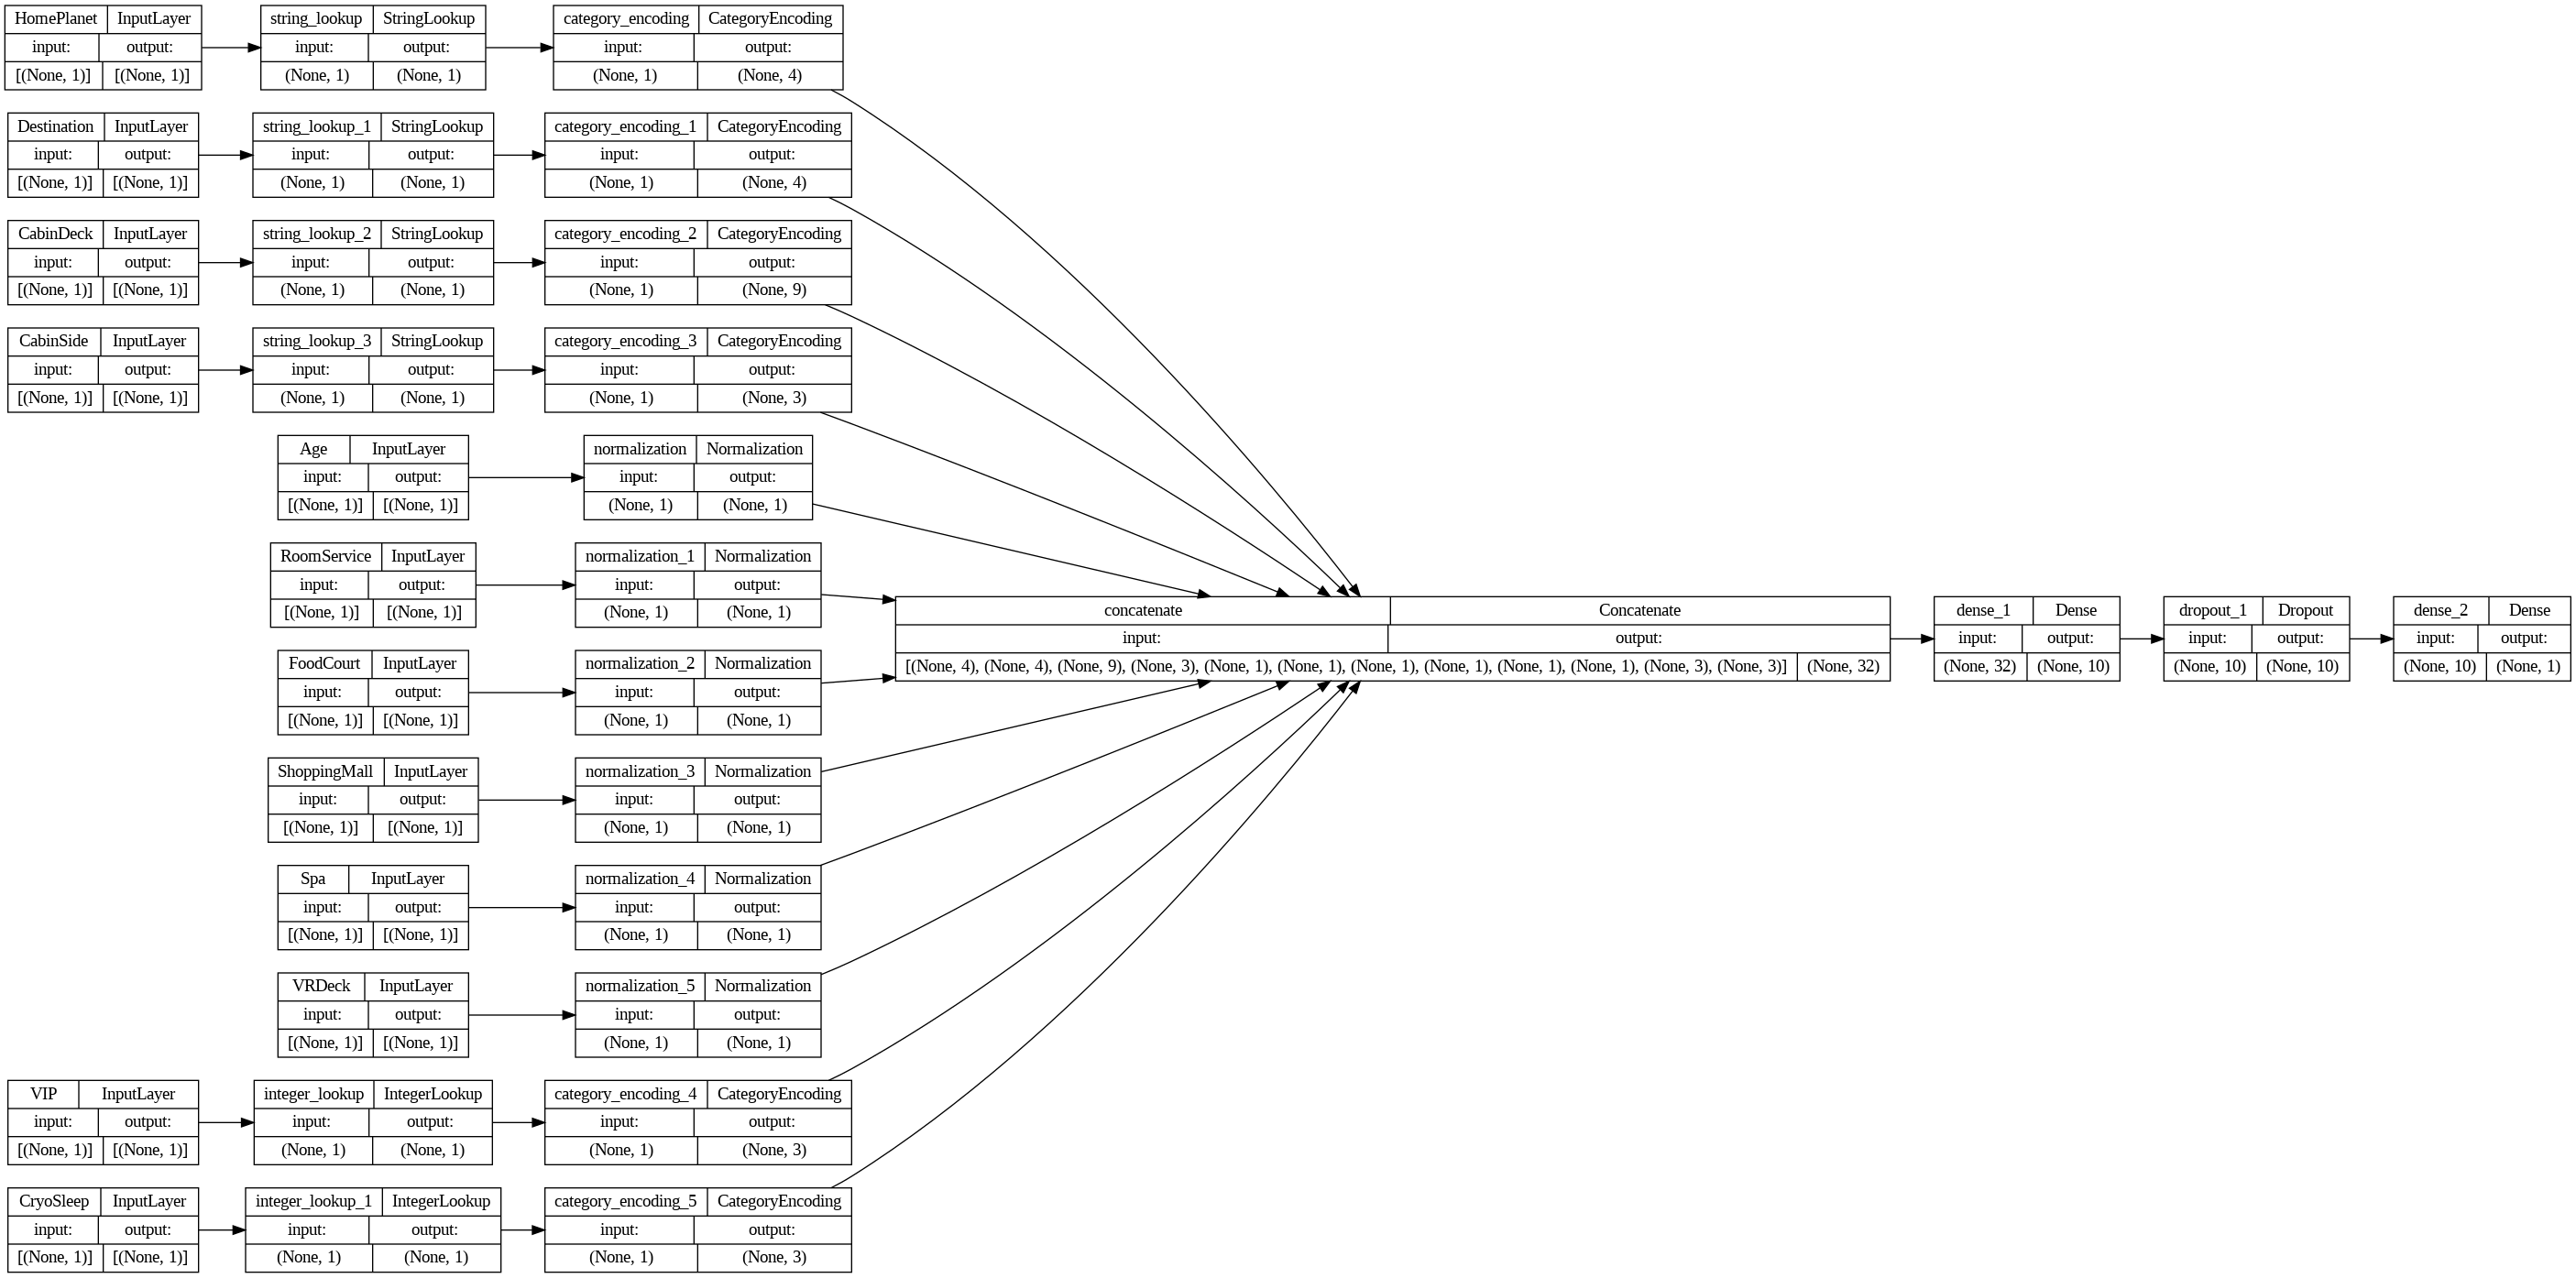

In [73]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [74]:
# Clone and create model with the best weights
model.load_weights(model.name)

model.compile(
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

In [75]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Model loss on the validation set: {loss:.2f}")
print(f"Model accuracy on the validation set: {100*accuracy:.2f}%")

7/7 [==============================] - 1s 6ms/step - loss: 0.5438 - accuracy: 0.7274
Model loss on the validation set: 0.54
Model accuracy on the validation set: 72.74%


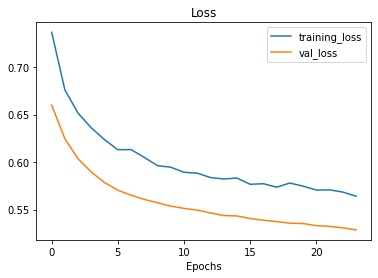

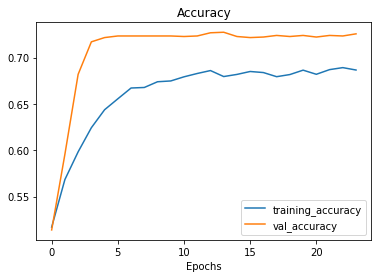

In [76]:
plot_loss_curves(history)

# Test Predictions

In [77]:
predictions = model.predict(test_dataset)
prob = tf.nn.sigmoid(predictions)

# Add a new column to the testing DF where we cast to Bool to int. This will give us
# the Transported value for each passenger in the correct format.
test_df['Transported'] = np.round(prob).astype('bool').astype('object')


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['PassengerId'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


17/17 [==============================] - 1s 6ms/step


# Create Kaggle Submission

In [78]:
SUBMISSION_PATH = "/content/drive/MyDrive/Kaggle/spaceship-titanic/submission.csv"

test_df.to_csv(SUBMISSION_PATH, columns=['PassengerId', 'Transported'], index=False)